In [ ]:
import torch
import torchvision #The torchvision library is essential when working with images in PyTorch.
#import torchaudio

print("Torch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
#print("Torchaudio version:", torchaudio.__version__)

Torch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124
Torchaudio version: 2.6.0+cu124


In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn #nn stands for neural network module
from torchvision import transforms


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil#is used to perform high-level file operations, such as copying, moving, or deleting directories and files.
from sklearn.model_selection import train_test_split

#  Correct path
data_dir = '/content/drive/MyDrive/archive (1)' #kaggle
output_dir = '/content/drive/MyDrive/PS-project'
os.makedirs(output_dir, exist_ok=True)

#  Extended image formats
valid_exts = ('.jpg', '.jpeg', '.png', '.bmp', '.JPG', '.PNG')

#  Get class names (folders only)
class_names = [cls for cls in os.listdir(data_dir)
               if os.path.isdir(os.path.join(data_dir, cls))]

print("🔍 Found classes:", class_names)

#  Clean output folders
for split in ['train', 'val', 'test']:
    split_path = os.path.join(output_dir, split)
    if os.path.exists(split_path):
        shutil.rmtree(split_path)
    os.makedirs(split_path)

#  Process each class
for cls in class_names:
    cls_path = os.path.join(data_dir, cls)

    #  Collect images from subfolders
    images = []
    for root, _, files in os.walk(cls_path):
        images += [os.path.join(root, f) for f in files if f.lower().endswith(valid_exts)]

    print(f"\n📁 {cls}: {len(images)} images found")

    if len(images) < 3:
        print(f"⚠️ Skipping class {cls} due to not enough images")
        continue

    #  Split into 80% train, 10% val, 10% test
    train_imgs, remaining = train_test_split(images, test_size=0.2, random_state=42)
    val_imgs, test_imgs = train_test_split(remaining, test_size=0.5, random_state=42)

    for split, split_imgs in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
        split_cls_path = os.path.join(output_dir, split, cls)
        os.makedirs(split_cls_path, exist_ok=True)

        for img_path in split_imgs:
            img_name = os.path.basename(img_path)
            dst_path = os.path.join(split_cls_path, img_name)

            #  Handle duplicate names
            base, ext = os.path.splitext(img_name)
            counter = 1
            while os.path.exists(dst_path):  #This is used to avoid overwriting an image file if one with the same name already exists
                dst_path = os.path.join(split_cls_path, f"{base}_{counter}{ext}")
                counter += 1

            shutil.copyfile(img_path, dst_path)

        print(f"✅ {split.upper()}: {len(split_imgs)} images")

print("\n🎉 Splitting complete!")


🔍 Found classes: ['Cracks', 'Patch', 'Potholes', 'Surface_Defects']

📁 Cracks: 100 images found
✅ TRAIN: 80 images
✅ VAL: 10 images
✅ TEST: 10 images

📁 Patch: 100 images found
✅ TRAIN: 80 images
✅ VAL: 10 images
✅ TEST: 10 images

📁 Potholes: 100 images found
✅ TRAIN: 80 images
✅ VAL: 10 images
✅ TEST: 10 images

📁 Surface_Defects: 100 images found
✅ TRAIN: 80 images
✅ VAL: 10 images
✅ TEST: 10 images

🎉 Splitting complete!


In [ ]:
import os #os is Python’s Operating System interface module. It’s often used in ML and DL projects for:

# 1. Handling Paths
# Used to join folders and filenames


output_dir = '/content/drive/MyDrive/PS-project'
data_dir = '/content/drive/MyDrive/archive (1)'

splits = ['train', 'val', 'test']


print("📊 Image count per class per split:\n")

for split in splits:
    split_path = os.path.join(output_dir, split)
    print(f"🔹 {split.upper()}:")

    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            count = len([
                f for f in os.listdir(cls_path)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            print(f"  - {cls}: {count} images")
    print()


print("📊 Original dataset image count per class:\n")

class_names = os.listdir(data_dir)
for cls in class_names:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):

        image_files = []
        for root, dirs, files in os.walk(cls_path):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_files.append(os.path.join(root, file))
        print(f"{cls}: {len(image_files)} images")

for split in ['train', 'val', 'test']:
    split_cls_path = os.path.join(output_dir, split, cls)
    num_images = len([f for f in os.listdir(split_cls_path) if os.path.isfile(os.path.join(split_cls_path, f))])
    print(f"📁 {split.upper()}: {num_images} images in {cls} class")


📊 Image count per class per split:

🔹 TRAIN:
  - Cracks: 80 images
  - Patch: 80 images
  - Potholes: 80 images
  - Surface_Defects: 80 images

🔹 VAL:
  - Cracks: 10 images
  - Patch: 10 images
  - Potholes: 10 images
  - Surface_Defects: 10 images

🔹 TEST:
  - Cracks: 10 images
  - Patch: 10 images
  - Potholes: 10 images
  - Surface_Defects: 10 images

📊 Original dataset image count per class:

Cracks: 100 images
Patch: 100 images
Potholes: 100 images
Surface_Defects: 100 images
📁 TRAIN: 80 images in Surface_Defects class
📁 VAL: 10 images in Surface_Defects class
📁 TEST: 10 images in Surface_Defects class


In [ ]:
from transformers import ViTForImageClassification  # Imports the Vision Transformer model class from Hugging Face for image classification key module it classifies into types
import torch  # Imports the core PyTorch library for building and training deep learning models
import torch.nn as nn  # Imports PyTorch’s neural network module for layers like Linear, Dropout, etc.

model = ViTForImageClassification.from_pretrained(  # Loads a pretrained ViT model (DeiT small patch16) from Facebook
    "facebook/deit-small-patch16-224",  # Specifies the Hugging Face model ID
    num_labels=4,  # Sets the number of output labels to 4 (for your 4 road damage classes)
    ignore_mismatched_sizes=True  # Allows replacing the final layer even if its shape doesn’t match the pretrained one
)

model.classifier = nn.Linear(model.config.hidden_size, 4)  # Replaces the original classifier with a new one for 4-class prediction

model.eval()  # Sets the model to evaluation mode (disables dropout, batchnorm updates, etc.)
model = model.to(device)  # Moves the model to the selected device (GPU if available, else CPU)
pretrained_vit = model  # Assigns the model to a variable named pretrained_vit (optional, used for clarity or reuse)

for name, param in model.named_parameters():  # Iterates over each parameter in the model (name and value)
    print(name)  # Prints the name of each parameter (useful for checking trainable layers or debugging)

# Part	Meaning
# facebook	The organization that trained and published the model (FAIR).
# deit	Stands for Data-efficient Image Transformer.
# small	The size of the model — smaller than base and large versions.
# patch16	The image is split into 16x16 pixel patches before processing.
# 224	The model expects 224×224 resolution input images.


Some weights of ViTForImageClassification were not initialized from the model checkpoint at facebook/deit-small-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 384]) in the checkpoint and torch.Size([4, 384]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vit.embeddings.cls_token
vit.embeddings.position_embeddings
vit.embeddings.patch_embeddings.projection.weight
vit.embeddings.patch_embeddings.projection.bias
vit.encoder.layer.0.attention.attention.query.weight
vit.encoder.layer.0.attention.attention.query.bias
vit.encoder.layer.0.attention.attention.key.weight
vit.encoder.layer.0.attention.attention.key.bias
vit.encoder.layer.0.attention.attention.value.weight
vit.encoder.layer.0.attention.attention.value.bias
vit.encoder.layer.0.attention.output.dense.weight
vit.encoder.layer.0.attention.output.dense.bias
vit.encoder.layer.0.intermediate.dense.weight
vit.encoder.layer.0.intermediate.dense.bias
vit.encoder.layer.0.output.dense.weight
vit.encoder.layer.0.output.dense.bias
vit.encoder.layer.0.layernorm_before.weight
vit.encoder.layer.0.layernorm_before.bias
vit.encoder.layer.0.layernorm_after.weight
vit.encoder.layer.0.layernorm_after.bias
vit.encoder.layer.1.attention.attention.query.weight
vit.encoder.layer.1.attention.attention.query

In [ ]:
import torch

def get_model_size_in_mb(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    total_size = param_size + buffer_size
    return total_size / (1024 ** 2)

#This function calculates the total size (in megabytes) of a PyTorch model, including:

# All trainable parameters (weights, biases, etc.)

# All buffers (non-trainable tensors like running stats in BatchNorm)

model_size_mb = get_model_size_in_mb(model)
print(f"Loaded model size in memory: {model_size_mb:.2f} MB")

Loaded model size in memory: 82.65 MB


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
#     Because:

# Neural networks train faster and better with inputs in a standardized range

# Normalization brings pixel values to a range like [-1, 1]
])
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


eval_dataset = ImageFolder(root='/content/drive/MyDrive/PS-project/train', transform=transform)
eval_loader = DataLoader(eval_dataset, batch_size=32, shuffle=False)

class_names = eval_dataset.classes
print("✅ Classes:", class_names)

✅ Classes: ['Cracks', 'Patch', 'Potholes', 'Surface_Defects']


In [ ]:
import torch.nn as nn

model.eval()
loss_fn = nn.CrossEntropyLoss()

correct = 0
total = 0
total_loss = 0.0

with torch.no_grad():
    for inputs, labels in eval_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs).logits  #Logits are the raw, unnormalized output values of a neural network before applying softmax
        loss = loss_fn(outputs, labels)
        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
avg_loss = total_loss / len(eval_loader)

print(f"Accuracy before training: {accuracy:.2f}%")
print(f"Loss before training: {avg_loss:.4f}") # full balanced accuracy

Accuracy before training: 24.06%
Loss before training: 1.4196


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


eval_dataset = ImageFolder(root='/content/drive/MyDrive/PS-project/test', transform=transform)
eval_loader = DataLoader(eval_dataset, batch_size=32, shuffle=False)

class_names = eval_dataset.classes
print("✅ Classes:", class_names)

✅ Classes: ['Cracks', 'Patch', 'Potholes', 'Surface_Defects']


In [ ]:
import torch.nn as nn

model.eval()
loss_fn = nn.CrossEntropyLoss()
# CrossEntropyLoss combines LogSoftmax and NLLLoss in one function.
# It's commonly used for multi-class classification problems.
# It measures the difference between predicted class probabilities and the true class labels.
# The model tries to minimize this loss during training to improve accuracy.
correct = 0
total = 0
total_loss = 0.0

with torch.no_grad():
    for inputs, labels in eval_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs).logits
        loss = loss_fn(outputs, labels)
        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
avg_loss = total_loss / len(eval_loader)

print(f"Accuracy before testing: {accuracy:.2f}%")
print(f"Loss before testing: {avg_loss:.4f}")

Accuracy before testing: 20.00%
Loss before testing: 1.4477


In [ ]:
def set_seeds(seed=42):
  torch.manual_seed(seed) #Sets the random seed for CPU operations in PyTorch
  torch.cuda.manual_seed_all(seed) #Sets the random seed for gPU operations in PyTorch
  torch.backends.cudnn.deterministic=True #
  torch.backends.cudnn.deterministic = False #Makes sure CUDA uses predictable operations (slower, but repeatable)
#To ensure stable and repeatable training.
set_seeds()
#It fixes the randomness in your code so that every time you run it, you get the same results.

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary


summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                                Input Shape          Output Shape         Param #              Trainable
ViTForImageClassification (ViTForImageClassification)                  [32, 3, 224, 224]    [32, 4]              --                   True
├─ViTModel (vit)                                                       [32, 3, 224, 224]    [32, 197, 384]       --                   True
│    └─ViTEmbeddings (embeddings)                                      [32, 3, 224, 224]    [32, 197, 384]       76,032               True
│    │    └─ViTPatchEmbeddings (patch_embeddings)                      [32, 3, 224, 224]    [32, 196, 384]       295,296              True
│    │    └─Dropout (dropout)                                          [32, 197, 384]       [32, 197, 384]       --                   --
│    └─ViTEncoder (encoder)                                            [32, 197, 384]       [32, 197, 384]       --                   True
│    │    └─ModuleList (

In [ ]:

train_dir = '/content/drive/MyDrive/PS-project/train'
val_dir = '/content/drive/MyDrive/PS-project/val'
test_dir = '/content/drive/MyDrive/PS-project/test'

In [ ]:
import os  # Imports OS module for interacting with the operating system (like file paths)
import sys  # Imports system-specific parameters and functions
from torchvision import datasets, transforms  # Imports image datasets and transformation utilities from torchvision
from torch.utils.data import DataLoader  # Imports DataLoader class for batching and shuffling datasets
#Batching means splitting the dataset into small groups of samples instead of feeding the whole dataset to the model at once.
#Shuffling means randomly changing the order of the data before creating batches

def get_safe_num_workers():  # Defines a function to safely set the number of CPU workers
    if 'ipykernel' in sys.modules or 'google.colab' in sys.modules:  # Checks if running in Jupyter or Colab
        return 0  # If so, sets number of workers to 0 to avoid multiprocessing issues
    return os.cpu_count()  # Otherwise, uses all available CPU cores

#Because models don't directly take raw data
def create_dataloaders(  # Defines a function to create train, val, and test DataLoaders
    train_dir: str,  # Path to training dataset folder
    val_dir: str,  # Path to validation dataset folder
    test_dir: str,  # Path to test dataset folder
    batch_size: int,  # Number of samples per batch # batch size:How many samples (like images) should I process at once during training or testing
    num_workers: int = None  # Number of CPU workers (optional)
):
    if num_workers is None:  # If num_workers not set
        num_workers = get_safe_num_workers()  # Automatically set it based on environment

    train_transform = transforms.Compose([  # Defines image augmentations for training data
        transforms.Resize((256, 256)),  # Resize images to 256x256
        transforms.RandomCrop((224, 224)),  # Randomly crop to 224x224 for variation
        transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip image horizontally
        transforms.ToTensor(),  # Convert PIL image to tensor
        transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize image with mean=0.5 and std=0.5
    ])

    val_test_transform = transforms.Compose([  # Defines transform for val/test data (no augmentation)
        transforms.Resize((224, 224)),  # Resize image to 224x224
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize with same values
    ])

    train_data = datasets.ImageFolder(root=train_dir, transform=train_transform)  # Loads training dataset with transforms
    val_data = datasets.ImageFolder(root=val_dir, transform=val_test_transform)  # Loads validation dataset
    test_data = datasets.ImageFolder(root=test_dir, transform=val_test_transform)  # Loads test dataset

    train_dataloader_pretrained = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)  # Creates DataLoader for training
    val_dataloader_pretrained = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)  # DataLoader for validation
    test_dataloader_pretrained = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)  # DataLoader for testing

    return train_dataloader_pretrained, val_dataloader_pretrained, test_dataloader_pretrained  # Returns all 3 DataLoaders for use in training pipeline




In [ ]:
# # Step 1: Freeze all layers
# partial finetuning
for param in model.parameters():  # Loops over all parameters in the Vision Transformer model
    param.requires_grad = False  # Freezes them so they won't be updated during training (saves compute & avoids overfitting)

for name, param in model.named_parameters():  # Iterates through all named parameters (layer names + tensors)
    if (
        "classifier" in name  # Checks if the layer is the classifier head
        or "layer.8" in name  # OR it's encoder layer 8
        or "layer.9" in name  # OR encoder layer 9
        or "layer.10" in name  # OR encoder layer 10
        or "layer.11" in name  # OR encoder layer 11 (last layer)
    ):
        param.requires_grad = True  # If condition matches, unfreeze this layer (allow training)
    else:
        param.requires_grad = False  # Otherwise, keep it frozen (no training)

trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)  # Calculates total number of parameters that will be trained
total_params = sum(p.numel() for p in model.parameters())  # Calculates total number of parameters in the entire model

print(f"Trainable params: {trainable_params}")  # Prints number of trainable parameters
print(f"Total params: {total_params}")  # Prints total parameters (trainable + frozen)
# numel: Returns the total number of elements in a tensor p
#82mb size
#Partial fine-tuning means:
#Only some layers of a pre-trained model are updated (trained), while the rest are frozen (not updated)

Trainable params: 7099396
Total params: 21667204


In [ ]:
import torch  # Core PyTorch library for building and training models
from torch.optim import AdamW  # Imports the AdamW optimizer (Adam with weight decay)
from transformers import ViTForImageClassification  # Vision Transformer model class from Hugging Face
from torch.optim.lr_scheduler import StepLR  # Scheduler to reduce LR every few epochs (not used in this script)
import torch.nn as nn  # Neural network layers like Linear, Dropout
from torch.utils.data import DataLoader  # Loads data in batches for training/validation
from torch.optim.lr_scheduler import CosineAnnealingLR  # Cosine-based learning rate scheduler (not used here)
from torchvision import transforms  # Image transforms like Resize, Normalize
from torch.optim.lr_scheduler import ReduceLROnPlateau  # Scheduler to reduce LR when validation accuracy plateaus

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, else fallback to CPU

train_transforms = transforms.Compose([  # Image augmentations for training data
    transforms.Resize((256, 256)),  # Resize image to 256x256
    transforms.RandomCrop((224, 224)),  # Random crop to 224x224 to improve generalization
    transforms.RandomHorizontalFlip(),  # Randomly flip image left/right
    transforms.ToTensor(),  # Convert image to tensor format
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize using ImageNet RGB mean
                         std=[0.229, 0.224, 0.225])  # And ImageNet standard deviation
])

val_transforms = transforms.Compose([  # Preprocessing for validation data (no augmentation)
    transforms.Resize(256),  # Resize smaller side to 256 pixels
    transforms.CenterCrop(224),  # Crop center 224x224 patch
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize with ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

model.classifier = nn.Sequential(  # Redefine the classifier head of the ViT model
    nn.Dropout(0.6),  # Dropout to reduce overfitting
    nn.Linear(model.config.hidden_size, 4)  # Linear layer mapping hidden state to 4 output classes
)

model.to(device)  # Move model to GPU/CPU based on earlier device setting

loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)  # Use cross-entropy loss with label smoothing to prevent overconfidence

optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)  # Optimizer with learning rate and L2 regularization

scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)
# Reduce learning rate when validation accuracy doesn't improve for 2 epochs

num_epochs = 10  # Set total number of training epochs

for epoch in range(num_epochs):  # Loop through each epoch
    model.train()  # Set model to training mode
    running_loss = 0.0  # Accumulate loss per epoch
    correct_predictions = 0  # Counter for correct predictions
    total_samples = 0  # Total number of processed samples

    for inputs, labels in train_dataloader_pretrained:  # Load batches of training data
        inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to GPU/CPU

        optimizer.zero_grad()  # Reset gradients to zero before backpropagation

        outputs = model(inputs).logits  # Forward pass: get logits from model
        loss = loss_fn(outputs, labels)  # Compute loss between predictions and ground truth

        loss.backward()  # Backpropagation: compute gradients
        optimizer.step()  # Update model parameters

        running_loss += loss.item()  # Accumulate loss value
        _, predicted = torch.max(outputs, 1)  # Get class with highest logit score
        correct_predictions += (predicted == labels).sum().item()  # Count correct predictions
        total_samples += labels.size(0)  # Add number of samples in batch to total

    epoch_loss = running_loss / len(train_dataloader_pretrained)  # Average loss over all batches
    epoch_accuracy = correct_predictions / total_samples * 100  # Accuracy as percentage
    print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.2f}%")  # Print summary for this epoch

def evaluate(model, val_dataloader_pretrained, device):  # Define function to evaluate model on validation data
    model.eval()  # Set model to evaluation mode (no dropout, no batch norm updates)
    correct_predictions = 0  # Count correct predictions
    total_predictions = 0  # Count total predictions

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in val_dataloader_pretrained:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU/CPU
            outputs = model(inputs).logits  # Get logits from model
            _, predicted = torch.max(outputs, 1)  # Pick the class with the highest logit
            correct_predictions += (predicted == labels).sum().item()  # Count correct predictions
            total_predictions += labels.size(0)  # Add number of predictions

    val_accuracy = correct_predictions / total_predictions  # Calculate accuracy
    print(f"Validation Accuracy: {val_accuracy:.4f}")  # Display result
    return val_accuracy  # Return for use in learning rate scheduler

val_acc = evaluate(model, val_dataloader_pretrained, device)  # Run validation and get accuracy
scheduler.step(val_acc)  # Adjust learning rate if accuracy plateaus
# learning rate at the end of the epoch



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1/10 - Loss: 1.1505 - Accuracy: 55.00%
Epoch 2/10 - Loss: 0.5151 - Accuracy: 95.62%
Epoch 3/10 - Loss: 0.4491 - Accuracy: 96.25%
Epoch 4/10 - Loss: 0.4254 - Accuracy: 99.38%
Epoch 5/10 - Loss: 0.4100 - Accuracy: 99.69%
Epoch 6/10 - Loss: 0.4249 - Accuracy: 97.50%
Epoch 7/10 - Loss: 0.4257 - Accuracy: 96.56%
Epoch 8/10 - Loss: 0.3983 - Accuracy: 98.75%
Epoch 9/10 - Loss: 0.4005 - Accuracy: 98.75%
Epoch 10/10 - Loss: 0.3993 - Accuracy: 98.75%
Validation Accuracy: 0.8750


In [ ]:
torch.save(model.state_dict(), "best_vit_full_precision.pth")

In [ ]:
# Apply flips on [C,H,W] before unsqueezing
tta_transforms = [
    lambda x: x,  # identity (no transform)
    lambda x: torch.flip(x, dims=[2]),  # horizontal flip (width axis)
    lambda x: torch.flip(x, dims=[1]),  # vertical flip (height axis)
    lambda x: torch.rot90(x, k=1, dims=[1,2]),  # rotate image by 90 degrees clockwise
]

def tta_predict(model, image, device):  # Function to apply TTA on one image and predict
    model.eval()  # set model to evaluation mode
    preds = []  # list to store logits from all transformed versions
    for fn in tta_transforms:  # apply each TTA function
        img = fn(image)  # apply transformation to image
        img = img.unsqueeze(0).to(device)  # add batch dimension and move to device
        preds.append(model(img).logits)  # forward pass and collect logits
    avg_logits = torch.mean(torch.stack(preds), dim=0)  # average logits across all TTA transforms
    return torch.argmax(avg_logits, dim=1)  # return predicted class index with highest avg score

def test(model, dataloader, device, use_tta=False):  # function to evaluate model on test data
    model.to(device)  # move model to device
    model.eval()  # set evaluation mode
    correct = 0  # initialize correct prediction counter
    total = 0  # initialize total samples counter
    with torch.no_grad():  # disable gradient calculation
        for inputs, labels in dataloader:  # iterate over test data
            inputs, labels = inputs.to(device), labels.to(device)  # move data to device
            if use_tta:  # if test-time augmentation is enabled
                for i in range(inputs.size(0)):  # loop through each image in batch
                    pred = tta_predict(model, inputs[i], device)  # predict with TTA
                    correct += (pred == labels[i]).item()  # update correct count
                    total += 1  # increment sample count
            else:  # if not using TTA
                out = model(inputs).logits  # forward pass for entire batch
                _, predicted = torch.max(out, 1)  # get predicted class indices
                correct += (predicted == labels).sum().item()  # count correct predictions
                total += labels.size(0)  # count total samples
    acc = correct / total  # calculate accuracy
    print(f"{'TTA ' if use_tta else ''}Test Accuracy: {acc:.4f}")  # print result
    return acc  # return accuracy

test(model, test_dataloader_pretrained, device, use_tta=True)  # run test with TTA enabled



TTA Test Accuracy: 0.8750


0.875

In [ ]:
import torch
import torch.nn as nn
import torch.quantization

# Step 1: Move model to CPU
model_cpu = model.to("cpu")
model_cpu.eval()  # Quantization needs the model in eval mode

# Step 2: Quantize the model (dynamic quantization)
quantized_model = torch.quantization.quantize_dynamic(
    model_cpu,  #  Correct: pass the actual model
    {nn.Linear, nn.LayerNorm},  # Layers to quantize
    dtype=torch.qint8  # Quantization type
)

# Step 3: Save the quantized model
torch.save(quantized_model.state_dict(), "vit_peft_quantized.pth")


In [ ]:
def test(model, test_dataloader, device):  # Defines a function to test the model on test data
    model.eval()  # Sets the model to evaluation mode (important for disabling dropout, batch norm updates)
    correct_predictions = 0  # Counter to track correct predictions
    total_predictions = 0  # Counter to track total number of predictions

    with torch.no_grad():  # Disables gradient calculation (reduces memory & improves speed during inference)
        for inputs, labels in test_dataloader:  # Iterate through test dataset in batches

            inputs, labels = inputs.to(device), labels.to(device)  # Moves input images and labels to selected device

            model = model.to(device)  # Ensures the model itself is also on the same device as inputs

            outputs = model(inputs).logits  # Performs a forward pass and extracts the logits (raw class scores)
            _, predicted = torch.max(outputs, 1)  # Finds the class with the highest score for each input image

            correct_predictions += (predicted == labels).sum().item()  # Adds number of correct predictions
            total_predictions += labels.size(0)  # Adds batch size to total prediction count

    test_accuracy = correct_predictions / total_predictions  # Calculates accuracy as correct / total
    print(f"Test Accuracy: {test_accuracy:.4f}")  # Prints the test accuracy

test(quantized_model, test_dataloader_pretrained, torch.device("cpu")) #after pruning an quantization

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Accuracy: 0.8500


In [ ]:
import os

size_bytes = os.path.getsize("vit_peft_quantized.pth")
size_mb = size_bytes / (1024 * 1024)
print(f"Quantized model size: {size_mb:.2f} MB")

Quantized model size: 22.03 MB


In [ ]:
from torchinfo import summary  # Imports torchinfo, a library used to display a detailed model summary (like model.summary() in Keras)

summary(
    model=model,  # The model to be summarized (Vision Transformer in this case)
    input_size=(32, 3, 224, 224),  # Defines the shape of the input: batch of 32 RGB images of size 224x224
    # Format: (batch_size, num_channels, height, width)

    col_names=["input_size", "output_size", "num_params", "trainable"],
    # Specifies what information to show per layer:
    # - input_size: input shape to the layer
    # - output_size: output shape from the layer
    # - num_params: number of weights in the layer
    # - trainable: whether the layer is being updated during training

    col_width=20,  # Sets the column width for alignment/spacing in the summary output

    row_settings=["var_names"]  # Ensures layer names (like 'encoder.layer.11.attention') are shown in the summary
)


Layer (type (var_name))                                                Input Shape          Output Shape         Param #              Trainable
ViTForImageClassification (ViTForImageClassification)                  [32, 3, 224, 224]    [32, 4]              --                   Partial
├─ViTModel (vit)                                                       [32, 3, 224, 224]    [32, 197, 384]       --                   Partial
│    └─ViTEmbeddings (embeddings)                                      [32, 3, 224, 224]    [32, 197, 384]       76,032               False
│    │    └─ViTPatchEmbeddings (patch_embeddings)                      [32, 3, 224, 224]    [32, 196, 384]       (295,296)            False
│    │    └─Dropout (dropout)                                          [32, 197, 384]       [32, 197, 384]       --                   --
│    └─ViTEncoder (encoder)                                            [32, 197, 384]       [32, 197, 384]       --                   Partial
│    │    └─M

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


📊 Classification Report:
                 precision    recall  f1-score   support

         Cracks       0.91      1.00      0.95        10
          Patch       0.77      1.00      0.87        10
       Potholes       1.00      0.80      0.89        10
Surface_Defects       1.00      0.80      0.89        10

       accuracy                           0.90        40
      macro avg       0.92      0.90      0.90        40
   weighted avg       0.92      0.90      0.90        40


🧩 Confusion Matrix:
[[10  0  0  0]
 [ 0 10  0  0]
 [ 1  1  8  0]
 [ 0  2  0  8]]


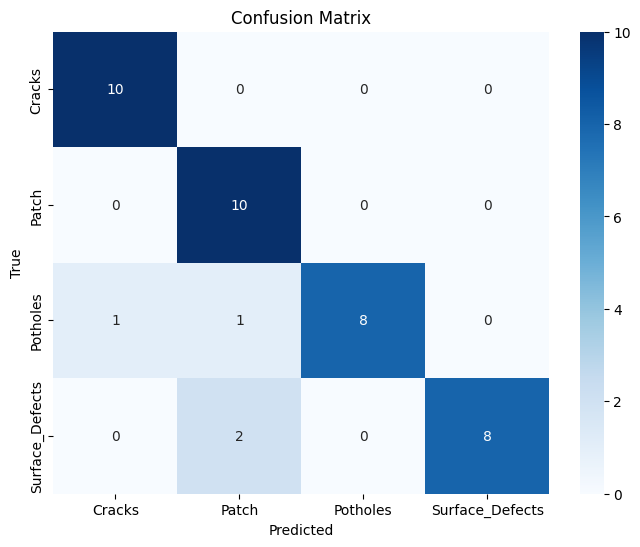

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the correct device
model = model.to(device)
model.eval()

# Store predictions and true labels
y_true = []
y_pred = []

# Evaluation loop
with torch.no_grad():
    for inputs, labels in test_dataloader_pretrained:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs).logits
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# === REPORTS === #
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("\n🧩 Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# === HEATMAP === #
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from torchvision import transforms

test_val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

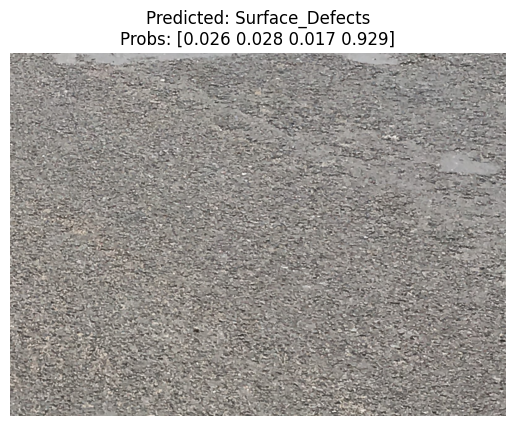

In [ ]:
# PIL (Python Imaging Library) is a popular library used to open, manipulate, and save many different image file formats.
# Here, we use 'Image' from PIL to open an image file and convert it into a format suitable for processing.

from PIL import Image
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import torch.nn.functional as F

def show_prediction(image_path, model):
    image = Image.open(image_path).convert('RGB')  # like open image and convert to RGB color format (3 channels)
    input_tensor = test_val_transform(image).unsqueeze(0).to(device)  # like apply preprocessing, add batch dim, move to device (CPU/GPU)

    model.eval()  # like set model to evaluation mode (turn off training-specific layers)
    with torch.no_grad():  # like disable gradient tracking for faster inference and less memory use
        output = model(input_tensor).logits  # like get raw output scores (logits) from the model
        probs = F.softmax(output, dim=1).squeeze().cpu().numpy()  # like convert logits to probabilities, remove batch dim, move to CPU, convert to numpy
        pred_class = class_names[probs.argmax()]  # like get class name with highest predicted probability

    plt.imshow(image)  # like display the original input image
    plt.axis('off')  # like hide axis ticks and labels for clean visualization
    plt.title(f"Predicted: {pred_class}\nProbs: {probs.round(3)}")  # like set title showing predicted class and probabilities (rounded)
    plt.show()  # like show the image and prediction plot on screen

show_prediction("/content/drive/MyDrive/PS-project/test/Surface_Defects/95.jpg", model)

In [ ]:
save_path = "/content/drive/MyDrive/PS-project/vit_model.pth"
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

Model saved to /content/drive/MyDrive/PS-project/vit_model.pth


In [ ]:
"""
Explanation:

- `cv2` is OpenCV, a powerful library mainly used for real-time computer vision tasks such as reading images, video processing, and image transformations.
  In this snippet, even though `cv2` is imported, it is not used directly. Usually, you might use cv2 to read images or apply image processing before passing to the model.

- `PIL` (Python Imaging Library) is used here to open the image file in a format easy to manipulate and compatible with PyTorch transformations.

- `torch` and `torchvision.transforms` are used to handle the model and preprocess the image to match what the model expects:
    - Resize the image to 224x224 pixels
    - Convert the image to a PyTorch tensor
    - Normalize the tensor with mean and standard deviation values typical for pretrained models

- `class_names` is a list mapping the model’s output indices to human-readable class labels.

- The `predict_damage_type` function:
    - Loads and preprocesses the image
    - Sends it through the model (in evaluation mode, without gradient computation)
    - Handles outputs that might have a `.logits` attribute (like Hugging Face models)
    - Gets the predicted class index and returns the corresponding class name from `class_names`
"""

import cv2                                       # import OpenCV library for image/video processing
from PIL import Image                            # import PIL to open and manipulate images
import torch                                     # import PyTorch for model and tensor operations
from torchvision import transforms              # import torchvision transforms for preprocessing

class_names = ['crack', 'patch', 'pothole', 'surface']  # list of damage type class names matching model output indices

test_val_transform = transforms.Compose([      # define preprocessing steps applied to input images
    transforms.Resize((224, 224)),              # resize image to 224x224 pixels (common input size for models)
    transforms.ToTensor(),                       # convert image to PyTorch tensor (values from 0 to 1)
    transforms.Normalize(mean=[0.485, 0.456, 0.406],   # normalize tensor channels with mean and std dev (pretrained model norms)
                         std=[0.229, 0.224, 0.225])
])

def predict_damage_type(image_path, model):    # function to predict damage class given an image path and a model
    image = Image.open(image_path).convert('RGB')         # open image and convert to RGB format (3 color channels)
    input_tensor = test_val_transform(image).unsqueeze(0).to(device)  # preprocess, add batch dim, move to device (CPU/GPU)

    model.eval()                                     # set model to evaluation mode (disable dropout, etc.)
    with torch.no_grad():                            # disable gradient tracking for faster inference
        outputs = model(input_tensor)                # forward pass: get model predictions (raw scores)
        if hasattr(outputs, 'logits'):               # check if outputs have 'logits' attribute (common in some models)
            outputs = outputs.logits                 # if yes, use logits for prediction
        predicted_class = torch.argmax(outputs, dim=1).item()  # get index of max probability (predicted class)

    return class_names[predicted_class]              # return class name corresponding to predicted index

In [ ]:
# Severity Estimation
def estimate_severity(image_path):
    img = cv2.imread(image_path, 0)
    # Read image in grayscale mode (0 means grayscale)

    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    # Check if image was loaded correctly, else raise error

    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    # Apply Gaussian blur with 5x5 kernel to reduce noise and smooth the image
    # This helps in better thresholding by removing small fluctuations

    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Apply Otsu's thresholding combined with binary inversion:
    # Otsu's method automatically finds an optimal threshold value
    # Binary inversion makes the areas of interest white and background black

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Find contours in the thresholded image:
    # cv2.RETR_EXTERNAL retrieves only the external (outer) contours
    # cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points
    # This reduces memory usage

    total_area = sum(cv2.contourArea(c) for c in contours)
    # Calculate total area covered by all contours by summing individual contour areas

    if total_area > 6000:
        return "severe"
    elif total_area > 3000:
        return "moderate"
    else:
        return "minor"


In [ ]:
def get_repair_priority(damage_type, severity):
    """
    Assigns repair priority based on damage type and severity.
    """

    # High priority cases
    if damage_type == "pothole":
        if severity == "severe":
            return "high"
        elif severity == "moderate":
            return "medium"
        else:
            return "medium"

    # Crack cases
    elif damage_type == "crack":
        if severity == "severe":
            return "medium"
        elif severity == "moderate":
            return "medium"
        else:
            return "low"

    # Patch cases
    elif damage_type == "patch":
        if severity == "severe":
            return "medium"
        elif severity == "moderate":
            return "low"
        else:
            return "low"

    # Surface defects
    elif damage_type == "surface":
        if severity == "severe":
            return "medium"
        elif severity == "moderate":
            return "low"
        else:
            return "low"

    # Default (if type unknown)
    else:
        return "low"


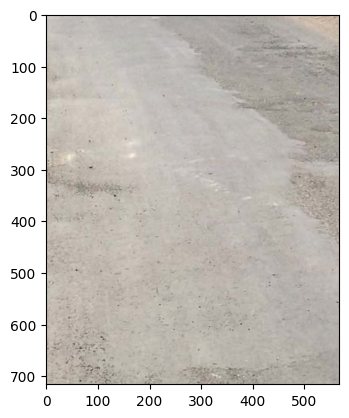

Predicted Class: patch


In [ ]:
import matplotlib.pyplot as plt
def predict_image(image_path, model):
    image = Image.open(image_path)  # Open the image file using PIL

    plt.imshow(image)               # Display the image
    plt.show()

    # Apply preprocessing transforms to the image (resize, normalize, etc.)
    # unsqueeze(0) adds a new dimension at position 0, converting shape from [C, H, W] to [1, C, H, W]
    # This "batch dimension" is required because models expect a batch of images as input, even if it's just one image
    image = test_val_transform(image).unsqueeze(0).to(device)

    model.eval()                    # Set model to evaluation mode (disables dropout, etc.)
    output = model(image).logits    # Get raw prediction scores (logits) from the model

    _, predicted = torch.max(output, 1)  # Get the index of the highest score (predicted class) along dimension 1 (class dimension)
    return class_names[predicted.item()]  # Convert predicted index to class name and return


image_path = "/content/drive/MyDrive/PS-project/test/Patch/80.jpg"
print(f"Predicted Class: {predict_image(image_path, model)}")

In [ ]:
image_path = "/content/drive/MyDrive/PS-project/test/Patch/1.jpg"

# Get predictions
predicted_type = predict_damage_type(image_path, model)
severity = estimate_severity(image_path)
priority = get_repair_priority(predicted_type, severity)

# Final result
result = {
    "type": predicted_type,
    "severity": severity,
    "repair_priority": priority
}

print(result)

{'type': 'patch', 'severity': 'severe', 'repair_priority': 'medium'}
